# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | jiaozuo
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | paramonga
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | howrah
Processing Record 10 of Set 1 | san antonio de pale
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | sambava
Processing Record 13 of Set 1 | morant bay
Processing Record 14 of Set 1 | newport
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | port-vila
Processing Record 18 of Set 1 | noyabrsk
Processing Record 19 of Set 1 | tucuma
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | santa elena de uairen
Processing Record 22 of Set 1 | ilulissat
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,10.30,74,99,4.98,CL,1732924934
1,port-aux-francais,-49.3500,70.2167,4.10,87,100,5.74,TF,1732925215
2,waitangi,-43.9535,-176.5597,13.79,64,33,4.47,NZ,1732925216
3,bredasdorp,-34.5322,20.0403,15.75,85,65,1.81,ZA,1732925217
4,jiaozuo,35.2397,113.2331,8.33,43,93,2.20,CN,1732924985


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,10.30,74,99,4.98,CL,1732924934
1,port-aux-francais,-49.3500,70.2167,4.10,87,100,5.74,TF,1732925215
2,waitangi,-43.9535,-176.5597,13.79,64,33,4.47,NZ,1732925216
3,bredasdorp,-34.5322,20.0403,15.75,85,65,1.81,ZA,1732925217
4,jiaozuo,35.2397,113.2331,8.33,43,93,2.20,CN,1732924985


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

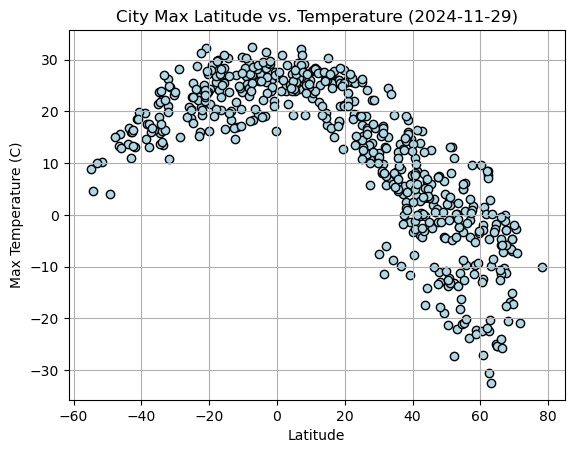

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

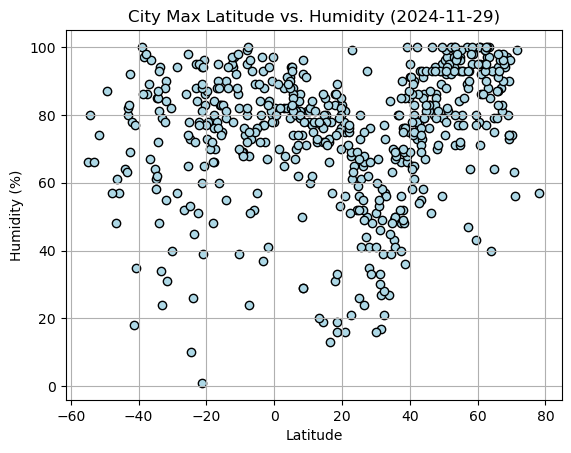

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

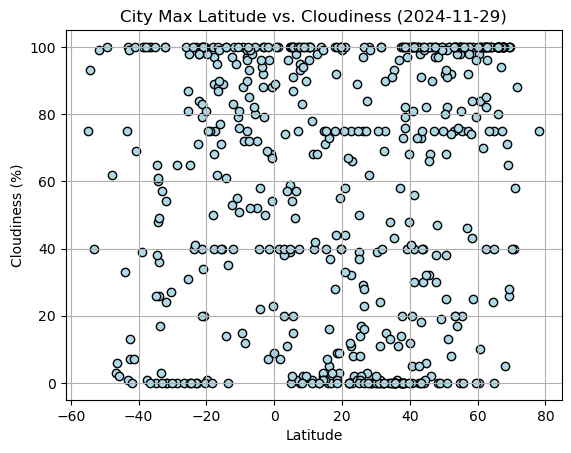

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

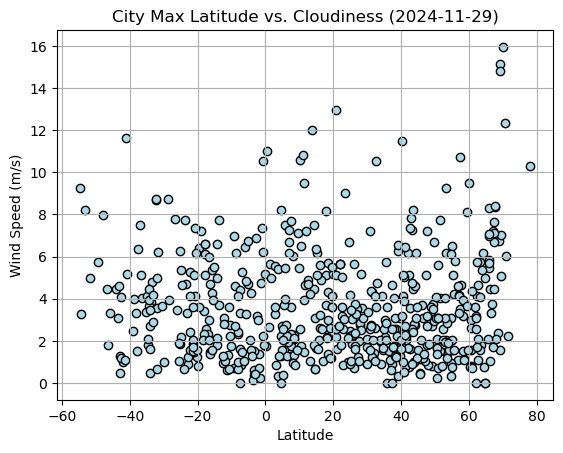

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [89]:
# Define a function to create Linear Regression plots
def compute_linear_regression(x_values, y_values):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    print(f"The r^2 Value is: {r_value**2:}")

    return slope, intercept

In [90]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,jiaozuo,35.2397,113.2331,8.33,43,93,2.20,CN,1732924985
5,yellowknife,62.4560,-114.3525,-22.47,77,40,4.12,CA,1732925219
8,howrah,22.5892,88.3103,22.00,68,75,3.60,IN,1732925223
10,kodiak,57.7900,-152.4072,1.73,64,100,4.63,US,1732925225
12,morant bay,17.8815,-76.4093,26.10,86,100,3.70,JM,1732925227


In [91]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,10.30,74,99,4.98,CL,1732924934
1,port-aux-francais,-49.3500,70.2167,4.10,87,100,5.74,TF,1732925215
2,waitangi,-43.9535,-176.5597,13.79,64,33,4.47,NZ,1732925216
3,bredasdorp,-34.5322,20.0403,15.75,85,65,1.81,ZA,1732925217
6,paramonga,-10.6667,-77.8333,20.53,86,79,3.60,PE,1732925220


###  Temperature vs. Latitude Linear Regression Plot

The r^2 Value is: 0.7297148151134795


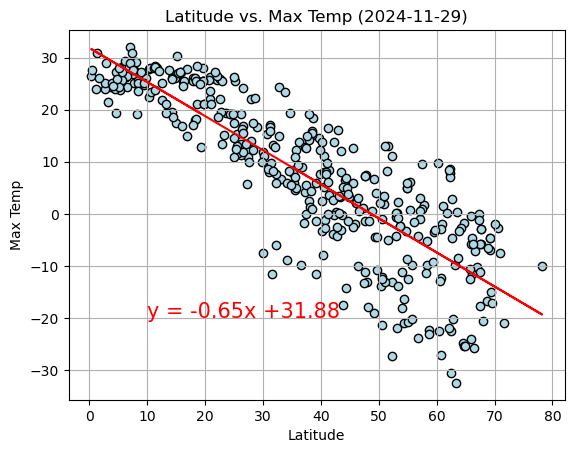

In [92]:
# Linear regression on Northern Hemisphere
slope, intercept = compute_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], color="lightblue", edgecolors="black")
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Max Temp (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.grid(True)
plt.show()

The r^2 Value is: 0.4336352123468627


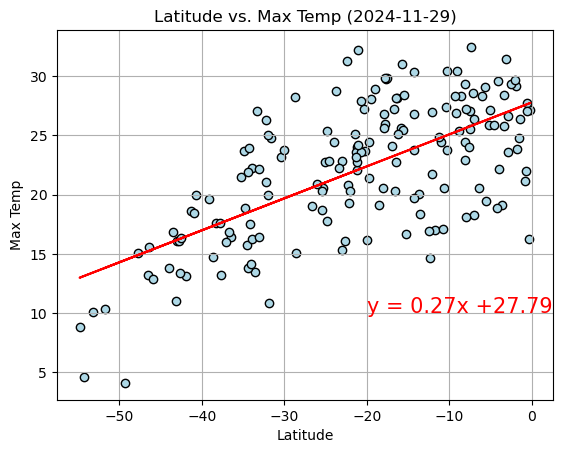

In [96]:
# Linear regression on Southern Hemisphere
slope, intercept = compute_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], color="lightblue", edgecolors="black")
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Max Temp (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** 

There is a strong correlation for both the Northern and Southern Hemisphere’s relationship between the latitude and max temperature.  The latitude in the Northern Hemisphere has its highest max temperatures around 0-30 which suggests that the closer to the equator, the higher the max temperature.  As we move further away from the equator the max temperature drops.  There is a similar correlation for the Southern Hemisphere, however the relationship is not as strong.  The Northern Hemisphere shows a much stronger relationship between latitude and max temperature as this is likely due to the greater amount of landmasses at higher latitudes.  The Southern Hemisphere has significantly more bodies of water which could be impacting the max temperature ranges and therefore resulting in the weaker correlation in our graph. 

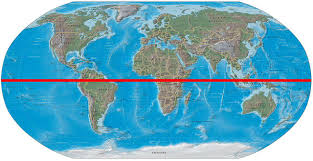


### Humidity vs. Latitude Linear Regression Plot

The r^2 Value is: 0.10272514527000909


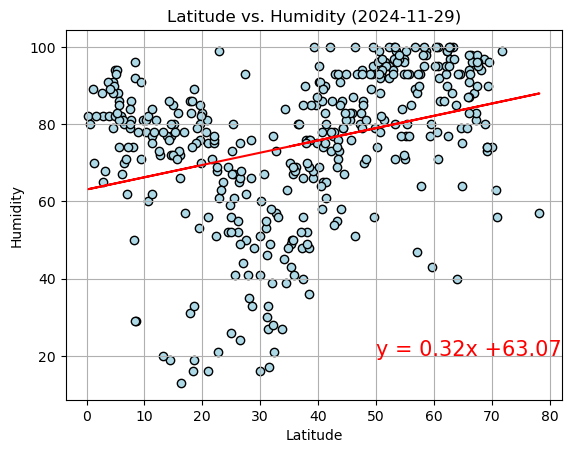

In [101]:
# Northern Hemisphere
slope, intercept = compute_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], color="lightblue", edgecolors="black")
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Humidity (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.grid(True)
plt.show()

The r^2 Value is: 0.024868723921584287


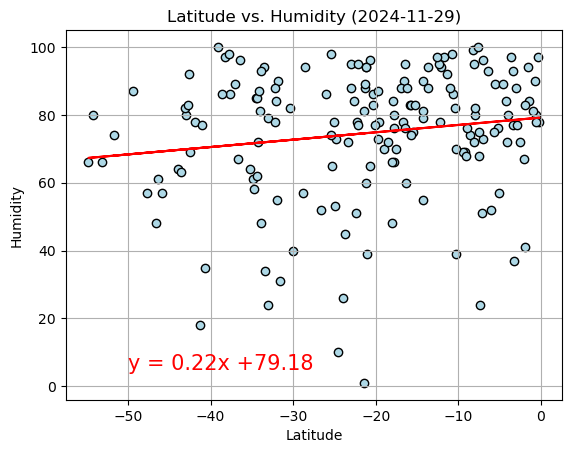

In [104]:
# Southern Hemisphere
slope, intercept = compute_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], color="lightblue", edgecolors="black")
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Humidity (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-50,5),fontsize=15,color="red")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:**

Both the Northern and Souther Hemispheres exhibit a weak correlations between latitude and humidity.  This indicaties that latitude may play some role in humidity but it is not a significant enough factor to confirm a definitive relationship between the two variables. According to the National Weather Services, Humidity levels are generally lower in winter than in summer, as such, variability is harder to determine during this particular period and may have influenced the correlation negatively.  If this graph was calculated during the summer, this graph may have reflected a much differe result. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 Value is: 0.06863660231789587


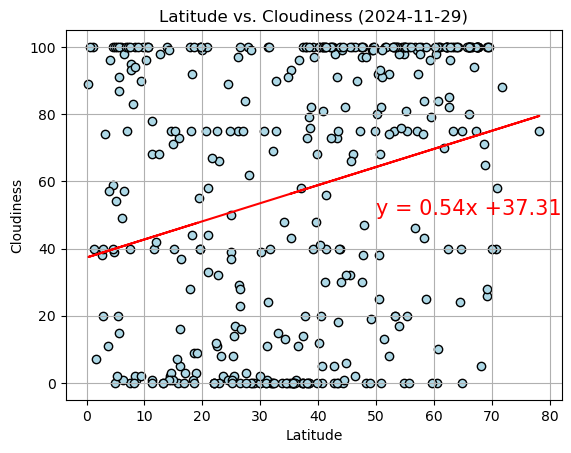

In [106]:
# Northern Hemisphere
slope, intercept = compute_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], color="lightblue", edgecolors="black")
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Cloudiness (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")
plt.grid(True)
plt.show()

The r^2 Value is: 0.05935911145413128


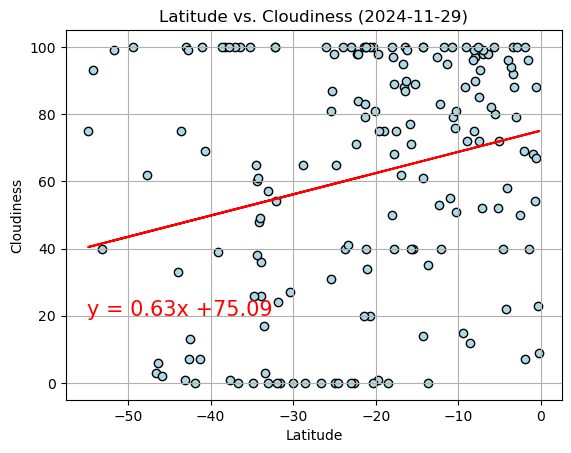

In [112]:
# Southern Hemisphere
slope, intercept = compute_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], color="lightblue", edgecolors="black")
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Cloudiness (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:**

Both hemispheres show a very weak relationship between latitude and cloudiness, as reflected by the low R^2 values. The weak correlation highlights that cloudiness is likely influenced by a  number of other factors, and latitude position is not a primary factor in the cloudiness of a particular region.  According to the Weather Channel, cloud cover is correlated with sunshine duration, so during the month on November into December, days become shorter (especially in the Northern Hemisphere) which would suggest why cloudiness is difficult to find a correlation during this periods. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 Value is: 0.005485418589283822


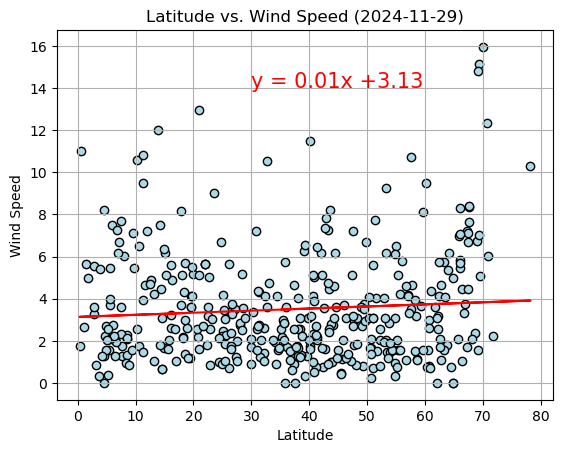

In [114]:
# Northern Hemisphere
slope, intercept = compute_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], color="lightblue", edgecolors="black")
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Wind Speed (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(30,14),fontsize=15,color="red")
plt.grid(True)
plt.show()

The r^2 Value is: 0.036645457007898716


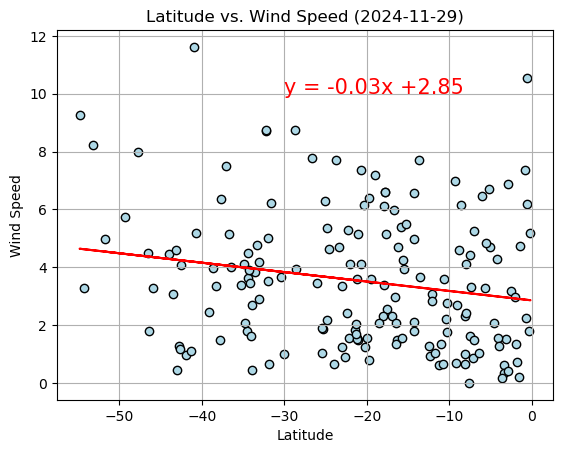

In [116]:
# Southern Hemisphere
slope, intercept = compute_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], color="lightblue", edgecolors="black")
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Wind Speed (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** 

The very low R^2 values in both hemispheres indicate that latitude does not have a strong impact on wind speed. According to the weather network, wind speed is influenced by many different factors, including atmospheric pressure systems, local geography and seasonal changes. In both the Northern and Southern Hemispheres, these factors have more significant impact of wind speed changes, making latitude a weak contributor of determining wind speed variability.  Stronger wind speed are present globally in April, suggesting the warm and cold tempretures clashing, these higher wind speeds could highlight stronger correlation between latitutde and wind speed, however, since the statiscs we are pulling are from a "traditionally" lower wind speed month (according to columbia university) these correlations may not be as evident.